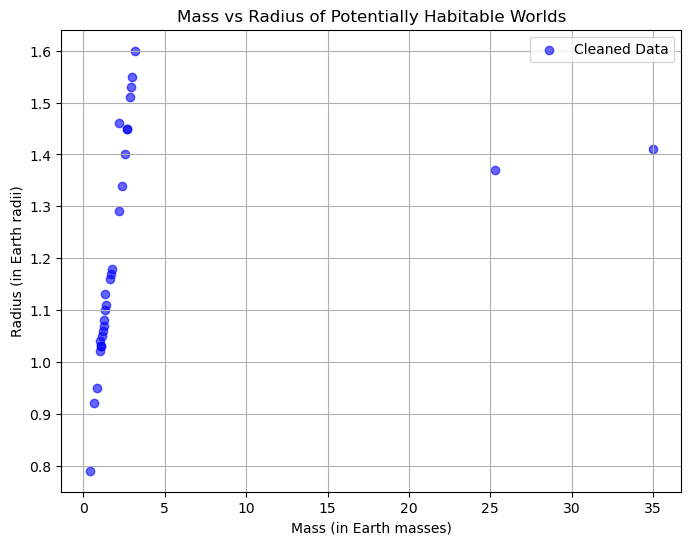

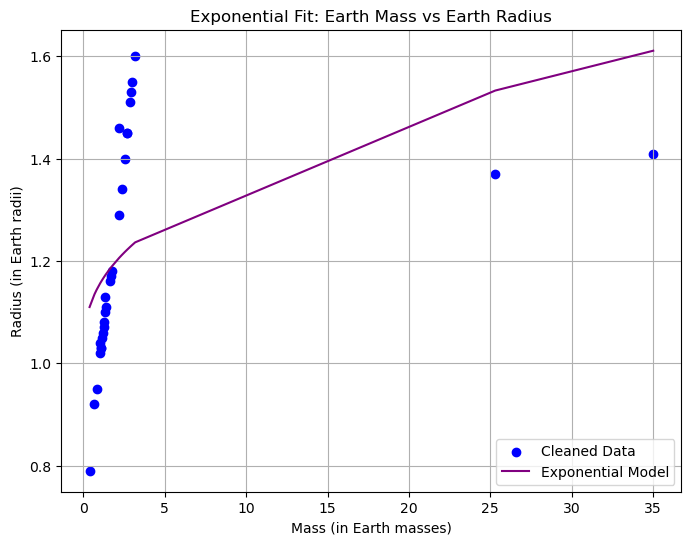

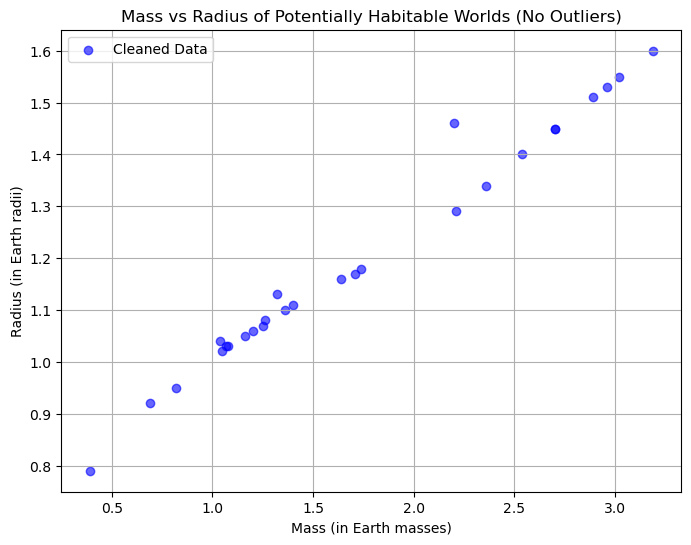

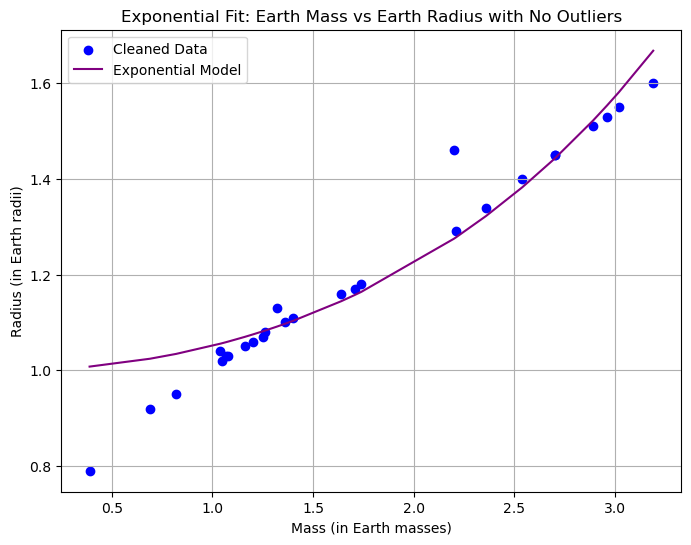

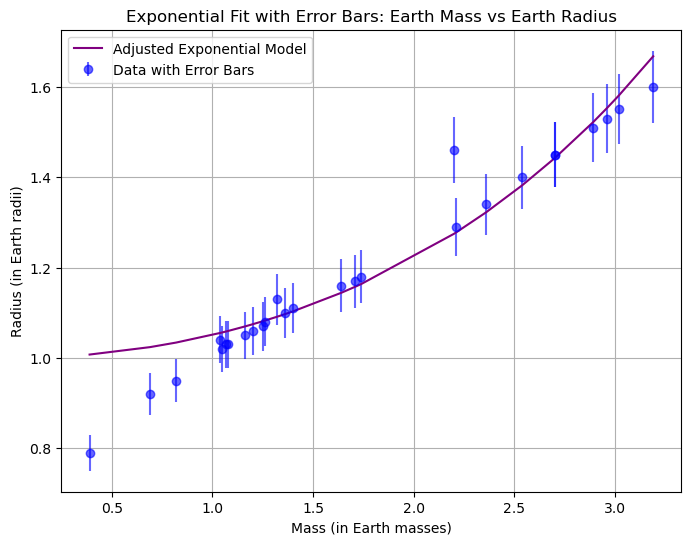

Fitted parameters: a = 0.049956463323724144, b = 2.00518967098986


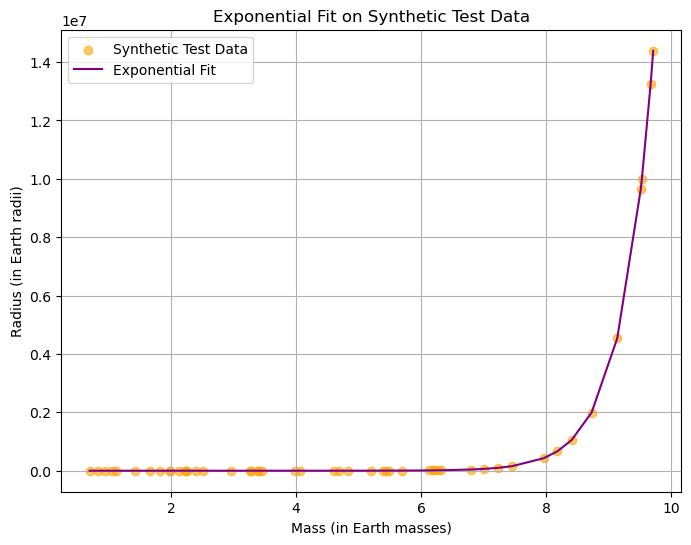

R-squared value: 0.22323766578807136


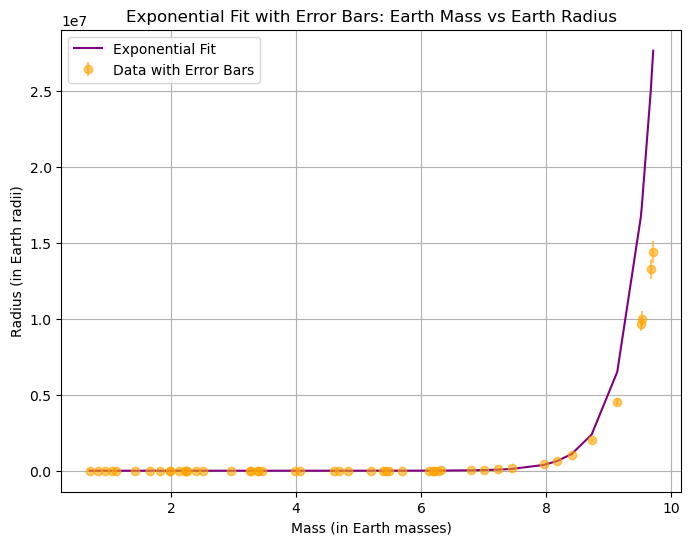

In [36]:
# Mass vs Radius of Exoplanets
# This project visualizes the relationship between the mass and radius of certain exoplanets, focusing on data from a predefined set of habitable worlds. By plotting these parameters, we aim to understand the relationship between mass and radius in exoplanets and identify any trends or patterns that might emerge.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


new_file_path = 'habitable_worlds.csv' 
new_data = pd.read_csv(new_file_path)

new_data_cleaned = new_data[['Name', 'EarthMass', 'EarthRadius']].dropna()

X_new = new_data_cleaned['EarthMass'].values
y_new = new_data_cleaned['EarthRadius'].values

plt.figure(figsize=(8, 6))
plt.scatter(X_new, y_new, color='blue', label="Cleaned Data", alpha=0.6)

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Mass vs Radius of Potentially Habitable Worlds')
plt.legend()
plt.grid(True)
plt.show()



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

new_file_path = 'habitable_worlds.csv'
new_data = pd.read_csv(new_file_path)

new_data_cleaned = new_data[['Name', 'EarthMass', 'EarthRadius']].dropna()

X_new = new_data_cleaned['EarthMass'].values
y_new = new_data_cleaned['EarthRadius'].values

X_new_log = np.log(X_new)
y_new_log = np.log(y_new)

def exponential_model(x, a, b):
    return a * np.exp(b * x)

initial_guess_exp = [1, 0.1] 
params_exp_new, _ = curve_fit(exponential_model, X_new_log, y_new_log, p0=initial_guess_exp)

y_exp_pred_new_log = exponential_model(X_new_log, *params_exp_new)

y_exp_pred_new = np.exp(y_exp_pred_new_log)

plt.figure(figsize=(8, 6))
plt.scatter(X_new, y_new, label="Cleaned Data", color='blue')

plt.plot(X_new, y_exp_pred_new, label="Exponential Model", color='purple')

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Exponential Fit: Earth Mass vs Earth Radius')
plt.legend()
plt.grid(True)
plt.show()

# Insights
# Although this dataset is from a conservative sample of habitable worlds, it is clear from the line of best fit that there are certainly outliers that skew the data right.
# There is a positive correlation between the radius and masses of these exoplanets
# I then removed the obvious outliers to try to get a better line


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

new_file_path = 'newhabitable_worlds.csv' 
new_data = pd.read_csv(new_file_path)
new_data_cleaned = new_data[['Name', 'EarthMass', 'EarthRadius']].dropna()

X_new = new_data_cleaned['EarthMass'].values
y_new = new_data_cleaned['EarthRadius'].values

plt.figure(figsize=(8, 6))
plt.scatter(X_new, y_new, color='blue', label="Cleaned Data", alpha=0.6)

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Mass vs Radius of Potentially Habitable Worlds (No Outliers)')
plt.legend()
plt.grid(True)
plt.show()



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

new_file_path = 'newhabitable_worlds.csv' 
new_data = pd.read_csv(new_file_path)

new_data_cleaned = new_data[['Name', 'EarthMass', 'EarthRadius']].dropna()

X_new = new_data_cleaned['EarthMass'].values
y_new = new_data_cleaned['EarthRadius'].values

X_new_log = np.log(X_new)
y_new_log = np.log(y_new)

def exponential_model(x, a, b):
    return a * np.exp(b * x)

initial_guess_exp = [1, 0.3] 
params_exp, _ = curve_fit(exponential_model, X_new_log, y_new_log, p0=initial_guess_exp)


y_exp_pred_log = exponential_model(X_new_log, *params_exp)

y_exp_pred = np.exp(y_exp_pred_log)

plt.figure(figsize=(8, 6))
plt.scatter(X_new, y_new, label="Cleaned Data", color='blue')

plt.plot(X_new, y_exp_pred, label="Exponential Model", color='purple')

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Exponential Fit: Earth Mass vs Earth Radius with No Outliers')
plt.legend()
plt.grid(True)
plt.show()




# Error analysis


def exponential_model(x, a, b):
    return a * np.exp(b * x)

X_new_log = np.log(X_new)
y_new_log = np.log(y_new)


initial_guess_exp_adjusted = [1, 0.3]  
params_exp_adjusted, _ = curve_fit(exponential_model, X_new_log, y_new_log, p0=initial_guess_exp_adjusted)

y_exp_pred_adjusted_log = exponential_model(X_new_log, *params_exp_adjusted)

y_exp_pred_adjusted = np.exp(y_exp_pred_adjusted_log)

error_radius = 0.05 * y_new  

plt.figure(figsize=(8, 6))
plt.errorbar(X_new, y_new, yerr=error_radius, fmt='o', color='blue', label="Data with Error Bars", alpha=0.6)

plt.plot(X_new, y_exp_pred_adjusted, label="Adjusted Exponential Model", color='purple')

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Exponential Fit with Error Bars: Earth Mass vs Earth Radius')
plt.legend()
plt.grid(True)
plt.show()



a, b = params_exp
print(f"Fitted parameters: a = {a}, b = {b}")



# Random test data

import numpy as np
import matplotlib.pyplot as plt

# Given parameters of the exponential model
a = 0.049956463323724144
b = 2.00518967098986

np.random.seed(42) 
mass_test = np.random.uniform(0.5, 10, size=50) 

radius_test = a * np.exp(b * mass_test)

sorted_indices = np.argsort(mass_test)
mass_test_sorted = mass_test[sorted_indices]
radius_test_sorted = radius_test[sorted_indices]

plt.figure(figsize=(8, 6))
plt.scatter(mass_test_sorted, radius_test_sorted, color='orange', label="Synthetic Test Data", alpha=0.6)

radius_fit = a * np.exp(b * mass_test_sorted)

plt.plot(mass_test_sorted, radius_fit, color='purple', label="Exponential Fit")

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Exponential Fit on Synthetic Test Data')
plt.legend()
plt.grid(True)
plt.show()


# Error analysis for the random data

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

a = 0.049956463323724144
b = 2.00518967098986

np.random.seed(42) 
mass_test = np.random.uniform(0.5, 10, size=50) 

radius_test = a * np.exp(b * mass_test)

error_radius = 0.05 * radius_test 

sorted_indices = np.argsort(mass_test) 
mass_test_sorted = mass_test[sorted_indices]
radius_test_sorted = radius_test[sorted_indices]
error_radius_sorted = error_radius[sorted_indices] 

def exponential_model(x, a, b):
    return a * np.exp(b * x)

mass_test_log = np.log(mass_test_sorted)
radius_test_log = np.log(radius_test_sorted)

params_exp_test, _ = curve_fit(exponential_model, mass_test_log, radius_test_log, p0=[1, 0.1])

radius_test_pred_log = exponential_model(mass_test_log, *params_exp_test)
radius_test_pred = np.exp(radius_test_pred_log)

residuals = radius_test_sorted - radius_test_pred

r2 = r2_score(radius_test_sorted, radius_test_pred)
print(f"R-squared value: {r2}")

plt.figure(figsize=(8, 6))
plt.errorbar(mass_test_sorted, radius_test_sorted, yerr=error_radius_sorted, fmt='o', color='orange', label="Data with Error Bars", alpha=0.6)

plt.plot(mass_test_sorted, radius_test_pred, color='purple', label="Exponential Fit")

plt.xlabel('Mass (in Earth masses)')
plt.ylabel('Radius (in Earth radii)')
plt.title('Exponential Fit with Error Bars: Earth Mass vs Earth Radius')
plt.legend()
plt.grid(True)
plt.show()

